<a href="https://colab.research.google.com/github/Viveek1218/CODSOFT/blob/main/codsoft_iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 3 - IRIS FLOWER CLASSIFICATION

### The goal of this task is to develop a machine learning model that accurately classify Iris flowers into their respective species.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

### Load dataset

In [4]:
# Create a dataframe
df = pd.read_csv("/content/IRIS.csv")

In [5]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
df.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.shape

(150, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Data Cleaning

In [9]:
# Checking null values
df.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [10]:
# Checking duplicate values
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
145,False
146,False
147,False
148,False


In [11]:
#Total duplicates values
df.duplicated().sum()

3

In [12]:
# Removing duplicate values
df = df.drop_duplicates()

In [13]:
df.shape

(147, 5)

In [14]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: >

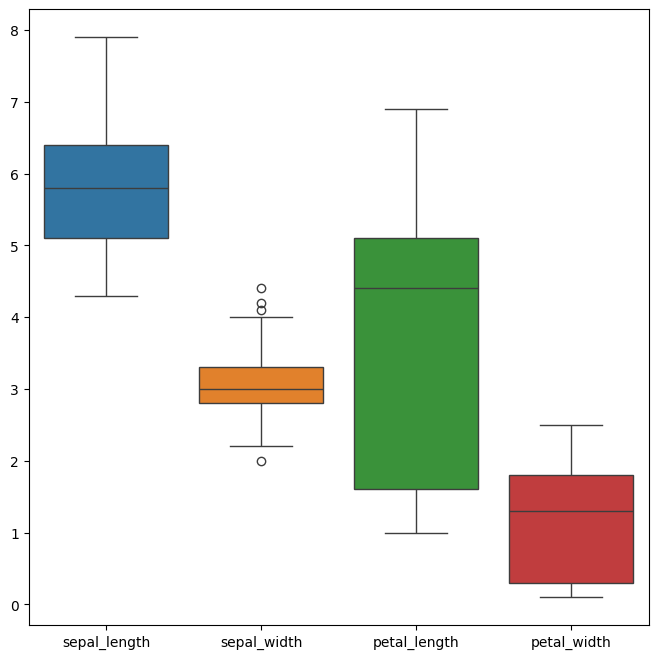

In [15]:
#Checking for outliers
fig,ax = plt.subplots(figsize=(8,8))
sns.boxplot(df,ax=ax)

#### ** No considerable outliers found in the data

## Exploratory Data Analysis (EDA)

### Descriptive Data Analysis

In [16]:
#Summary of the data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
df['species'].value_counts()

,count
species,
Iris-versicolor,50
Iris-virginica,49
Iris-setosa,48


<ipython-input-19-5d47f2096a3d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "species", data = df, palette = "viridis", legend = False)


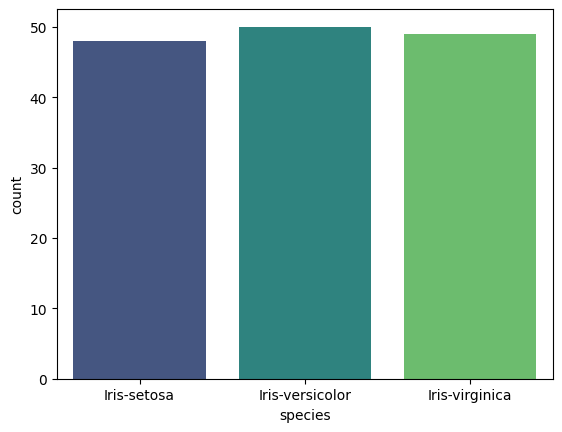

In [19]:
# Plotting the species data
sns.countplot(x = "species", data = df, palette = "viridis", legend = False)
plt.show()

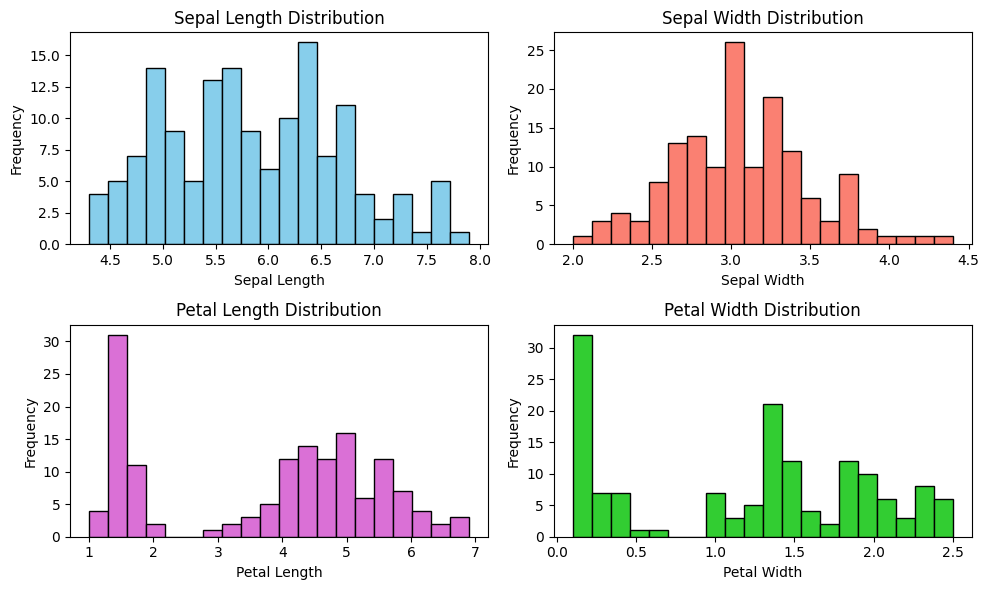

In [20]:
# Creating subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 6))

# Histogram for sepal_length
ax[0,0].hist(df['sepal_length'], bins=20, edgecolor='black', color='skyblue')
ax[0,0].set_xlabel('Sepal Length')
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_title('Sepal Length Distribution')

# Histogram for sepal_width
ax[0,1].hist(df['sepal_width'], bins=20, edgecolor='black', color='salmon')
ax[0,1].set_xlabel('Sepal Width')
ax[0,1].set_ylabel('Frequency')
ax[0,1].set_title('Sepal Width Distribution')

# Histogram for petal_length
ax[1,0].hist(df['petal_length'], bins=20, edgecolor='black', color='orchid')
ax[1,0].set_xlabel('Petal Length')
ax[1,0].set_ylabel('Frequency')
ax[1,0].set_title('Petal Length Distribution')

# Histogram for petal_width
ax[1,1].hist(df['petal_width'], bins=20, edgecolor='black', color='limegreen')
ax[1,1].set_xlabel('Petal Width')
ax[1,1].set_ylabel('Frequency')
ax[1,1].set_title('Petal Width Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

### Correlation Analysis

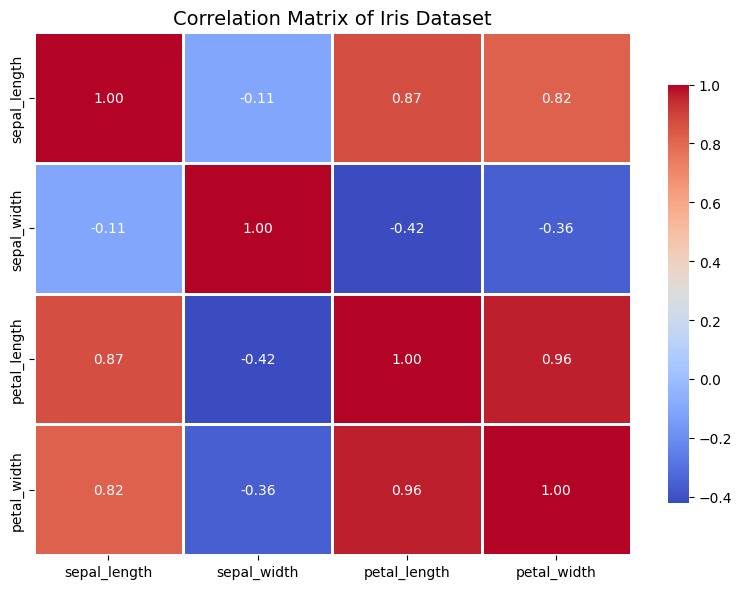

In [21]:
# Creating a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    df.drop(columns='species').corr(),
    annot = True,
    cmap = 'coolwarm',
    fmt = ".2f",
    ax = ax,
    linewidths = 1,
    cbar_kws = {'shrink': 0.8},
)

# Adding a title for the heatmap
ax.set_title('Correlation Matrix of Iris Dataset', fontsize=14)

# Adjusting layout
plt.tight_layout()

# Display the plot
plt.show()

##### * This shows relationship of petal_length and petal_width has highly positive correlated(=0.96). sepal_length has highly positive correlation with both petal_width and petal_length which are 0.82 and 0.87 as respectively. sepal_width has moderately negative correlation with both petal_width and petal_length.

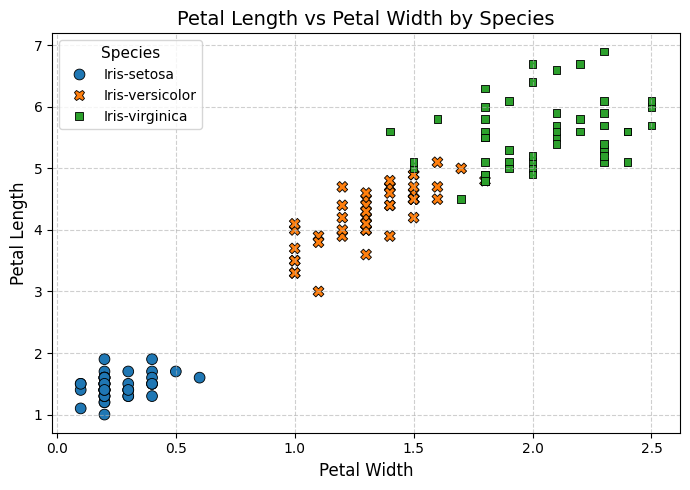

In [22]:
# Scatterplot for Petal Length vs Petal Width by Species
fig, ax = plt.subplots(figsize=(7, 5))

sns.scatterplot(
    x="petal_width",
    y="petal_length",
    hue="species",
    data=df,
    style="species",  # Different markers for species
    s=60,  # Slightly larger marker size for better visibility
    edgecolor="black",  # Add edge color for markers
)

# Adding labels and title
ax.set_xlabel('Petal Width', fontsize=12)
ax.set_ylabel('Petal Length', fontsize=12)
ax.set_title('Petal Length vs Petal Width by Species', fontsize=14)

# Adding a grid for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Adjusting legend placement
plt.legend(title='Species', loc='upper left', fontsize=10, title_fontsize=11)

# Display the plot
plt.tight_layout()
plt.show()

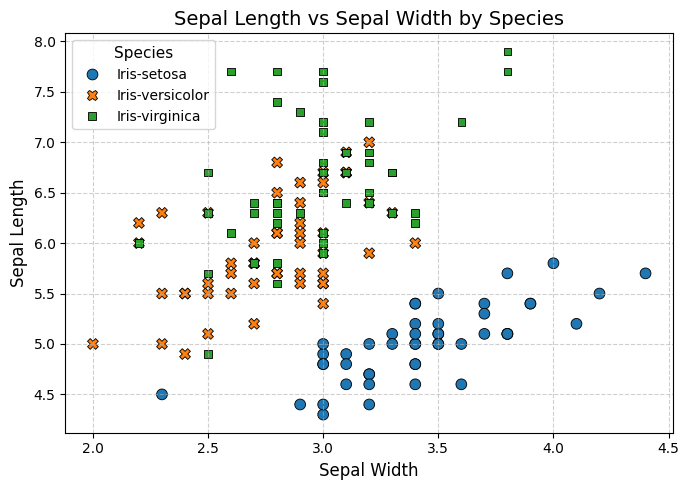

In [23]:
# Scatterplot for Sepal Length vs Sepal Width by Species
fig, ax = plt.subplots(figsize=(7, 5))

sns.scatterplot(
    x="sepal_width",
    y="sepal_length",
    hue="species",
    data=df,
    style="species",  # Different markers for species
    s=60,  # Slightly larger marker size for better visibility
    edgecolor="black",  # Add edge color for markers
)

# Adding labels and title
ax.set_xlabel('Sepal Width', fontsize=12)
ax.set_ylabel('Sepal Length', fontsize=12)
ax.set_title('Sepal Length vs Sepal Width by Species', fontsize=14)

# Adding a grid for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Adjusting legend placement
plt.legend(title='Species', loc='upper left', fontsize=10, title_fontsize=11)

# Display the plot
plt.tight_layout()
plt.show()

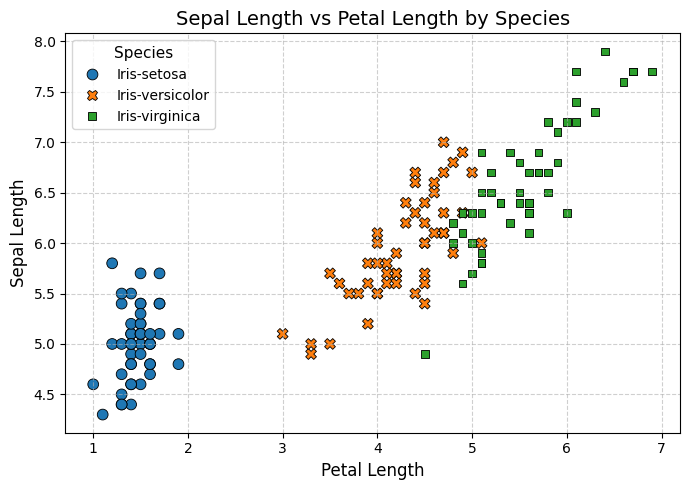

In [24]:
# Scatterplot for Sepal Length vs Sepal Width by Species
fig, ax = plt.subplots(figsize=(7, 5))

sns.scatterplot(
    x="petal_length",
    y="sepal_length",
    hue="species",
    data=df,
    style="species",  # Different markers for species
    s=60,  # Slightly larger marker size for better visibility
    edgecolor="black",  # Add edge color for markers
)

# Adding labels and title
ax.set_xlabel('Petal Length', fontsize=12)
ax.set_ylabel('Sepal Length', fontsize=12)
ax.set_title('Sepal Length vs Petal Length by Species', fontsize=14)

# Adding a grid for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Adjusting legend placement
plt.legend(title='Species', loc='upper left', fontsize=10, title_fontsize=11)

# Display the plot
plt.tight_layout()
plt.show()

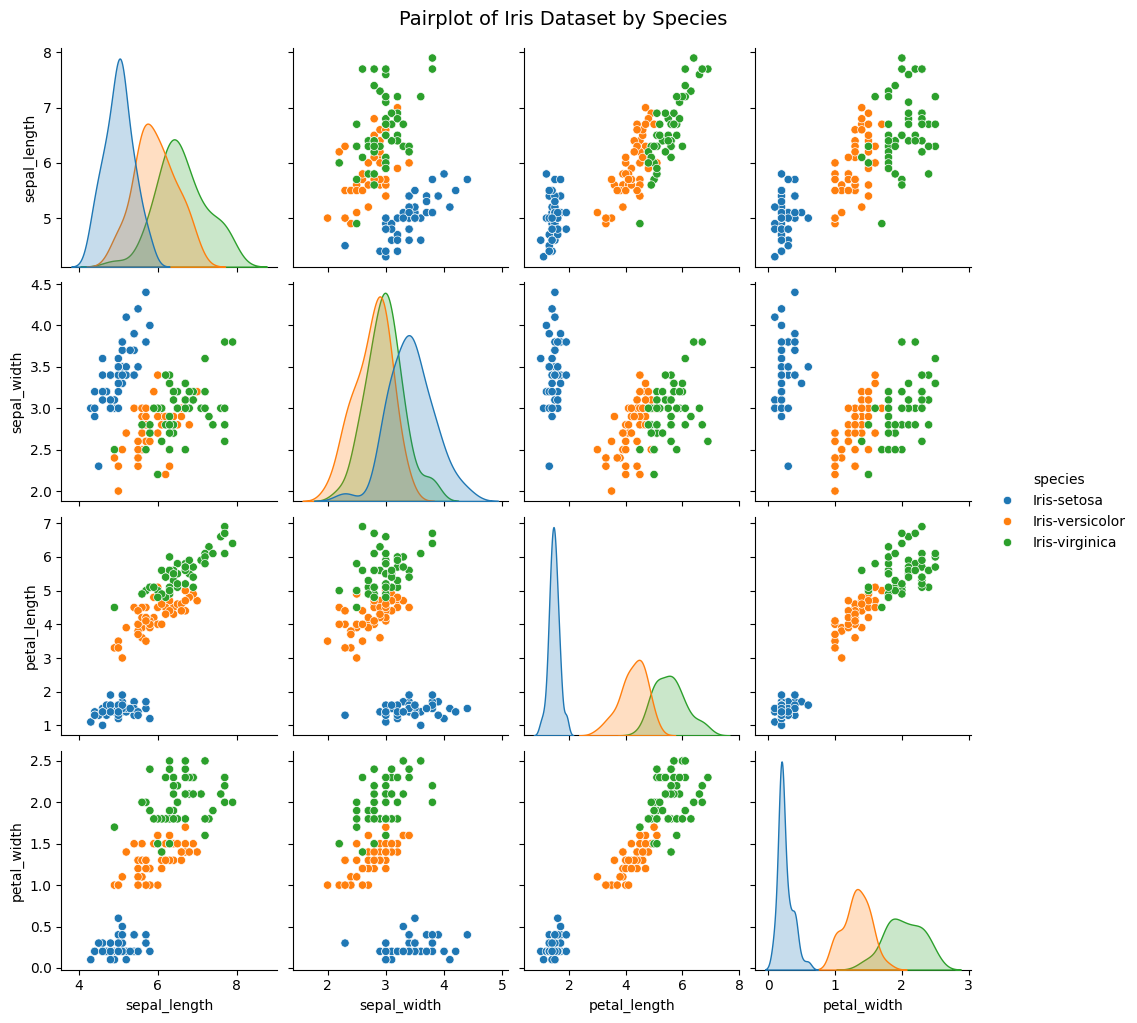

In [25]:
# Pairplot for Iris dataset
sns.pairplot( df, hue='species')

# Adding a title for the pairplot
plt.suptitle('Pairplot of Iris Dataset by Species', y=1.02, fontsize=14)

# Display the plot
plt.show()

## Label Encoder

In [26]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [27]:
df['species'] = label_encoder.fit_transform(df['species'])

In [28]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Data splitting

In [29]:
from sklearn.model_selection import train_test_split

# Define feature and target variables
X = df.drop(columns='species')
y = df['species']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Combine training features and target variable into a single DataFrame for convenience
train_data = pd.concat([X_train, y_train], axis=1)

# Display the first few rows of the combined training data
train_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
67,5.8,2.7,4.1,1.0,1
90,5.5,2.6,4.4,1.2,1
103,6.3,2.9,5.6,1.8,2
52,6.9,3.1,4.9,1.5,1
129,7.2,3.0,5.8,1.6,2


## Model Selection

### Model Building and Model Evaluation

#### 1. <b><u>Logistic Regression Model</u></b>

In [30]:
from sklearn.linear_model import LogisticRegression

# Build a Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)  # Random state and increased iterations for stability

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = logistic_model.predict(X_test)

Accuracy for Logistic Regression: 0.9667

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



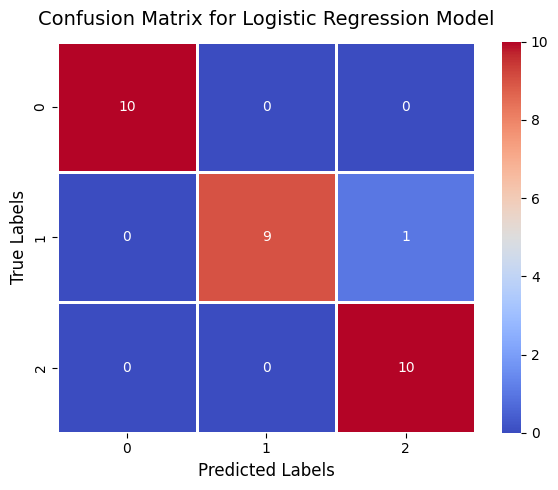

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model's performance
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy for Logistic Regression: {accuracy_lr:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(
    conf_matrix,
    annot = True,
    fmt = "d",  # Using the integer formatting since confusion matrix values are counts
    cmap = "coolwarm",
    linewidths = 1,  # Adding grid lines for clarity
)

# Add titles and labels
plt.title("Confusion Matrix for Logistic Regression Model", fontsize = 14, pad = 12)
plt.xlabel("Predicted Labels", fontsize = 12)
plt.ylabel("True Labels", fontsize = 12)

# Display the plot
plt.tight_layout()
plt.show()

###  <i>Interpretation for Performance Evaluation</i>


  ##### The model correctly classified 96.67% of the test data, which is a good performance. The Precision, Recall and F1-score show that the model is performing well for all three classes (0=Iris-setosa,1=Iris-versicolor,2=Iris-virginica). Also, as shown by the macro and weighted averages,the overall performance is excellent, with balanced performance across the classes.

  ##### The confusion matrix shows how well the model has predicted each class. According to confusion matrix, the model performs perfectly for class 0 and class 1. For class 2, there is 1 misclassification (an instance of class 2 was predicted as class 1).We can said that the model performs very well with only one mistake across all 30 instances. Overall, the model made 29 correct predictions and 1 incorrect prediction, which explains the high accuracy of 96.67%.



#### 2. <u><b>K- Nearest Neighbors (KNN) Model</u></b>

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Build a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # Default settings: 5 neighbors, Euclidean distance

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

Accuracy for KNN: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



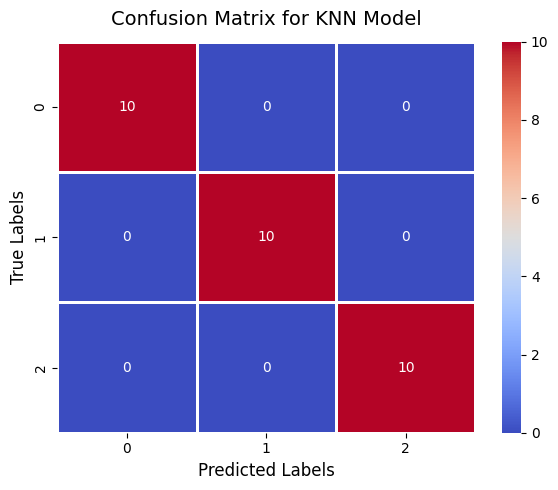

In [33]:
# Evaluate the KNN model's performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy for KNN: {accuracy_knn:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(
    conf_matrix_knn,
    annot=True,
    fmt="d",  # Using integer formatting for confusion matrix values
    cmap="coolwarm",
    linewidths=1,  # Adding grid lines for clarity
)

# Add titles and labels
plt.title("Confusion Matrix for KNN Model", fontsize=14, pad=12)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

#### 3. <u><b>Support Vector Machine (SVM) Model</u></b>

In [34]:
from sklearn.svm import SVC

# Build an SVM model
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)  # Default kernel (RBF) with regularization parameter C=1.0

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

Accuracy for SVM: 0.9333

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



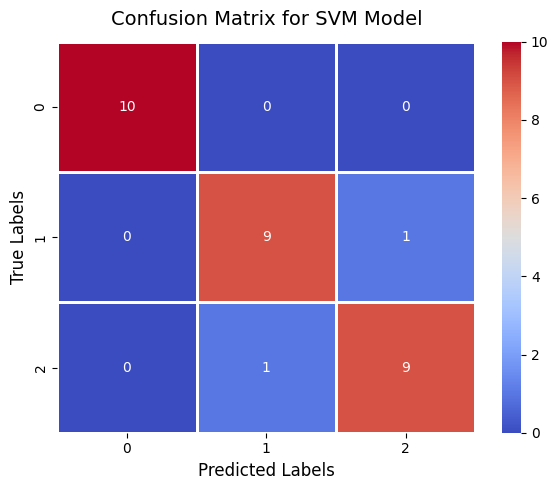

In [35]:
# Evaluate the SVM model's performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy for SVM: {accuracy_svm:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Visualize confusion matrix
plt.figure(figsize=(6, 5))  # Adjust figure size
sns.heatmap(
    conf_matrix_svm,
    annot=True,
    fmt="d",  # Display integer counts
    cmap="coolwarm",  # Professional color palette
    linewidths=1
)

# Add titles and labels
plt.title("Confusion Matrix for SVM Model", fontsize=14, pad=12)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

#### 4. <u><b>Decision Tree Model</u></b>

In [36]:
from sklearn.tree import DecisionTreeClassifier

# Build a Decision Tree model
dt_model = DecisionTreeClassifier(criterion='gini', random_state=42)  # Default criterion is Gini; random state for reproducibility

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

Accuracy for Decision Tree: 0.9333

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



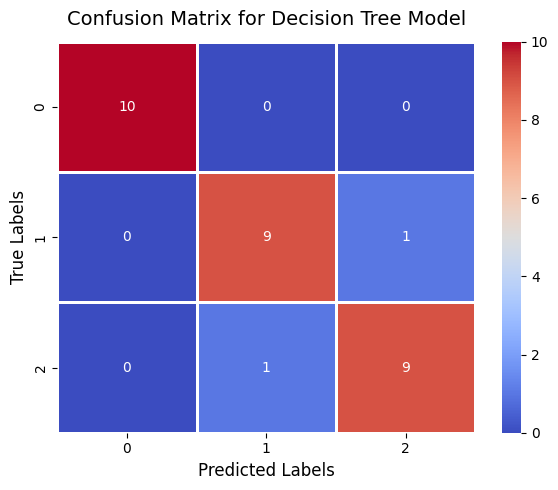

In [37]:
# Evaluate the Decision Tree model's performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy for Decision Tree: {accuracy_dt:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Visualize confusion matrix
plt.figure(figsize=(6, 5))  # Adjust figure size
sns.heatmap(
    conf_matrix_dt,
    annot=True,
    fmt="d",  # Use integer formatting for counts
    cmap="coolwarm",  # Better visual contrast
    linewidths=1,
)

# Add titles and labels
plt.title("Confusion Matrix for Decision Tree Model", fontsize=14, pad=12)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

#### 5. <u><b>Random Forest Classifier Model</u></b>

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Build a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)  # Default settings with reproducibility

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

Accuracy for Random Forest: 0.9667

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



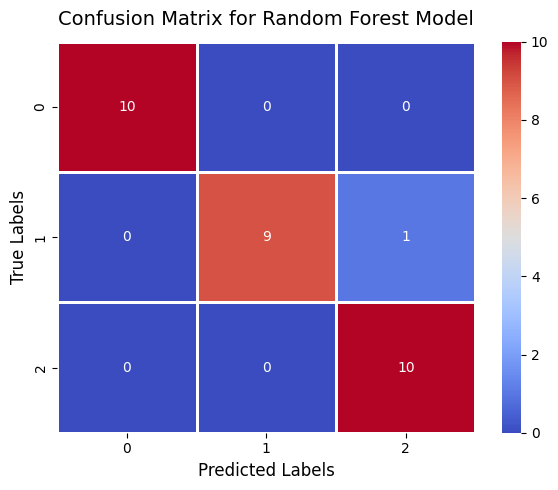

In [39]:

# Evaluate the Random Forest model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy for Random Forest: {accuracy_rf:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Visualize confusion matrix
plt.figure(figsize=(6, 5))  # Adjust figure size
sns.heatmap(
    conf_matrix_rf,
    annot=True,
    fmt="d",  # Use integer formatting for counts
    cmap="coolwarm",  # Better visual distinction
    linewidths=1,
)

# Add titles and labels
plt.title("Confusion Matrix for Random Forest Model", fontsize=14, pad=12)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

### Model Comparison

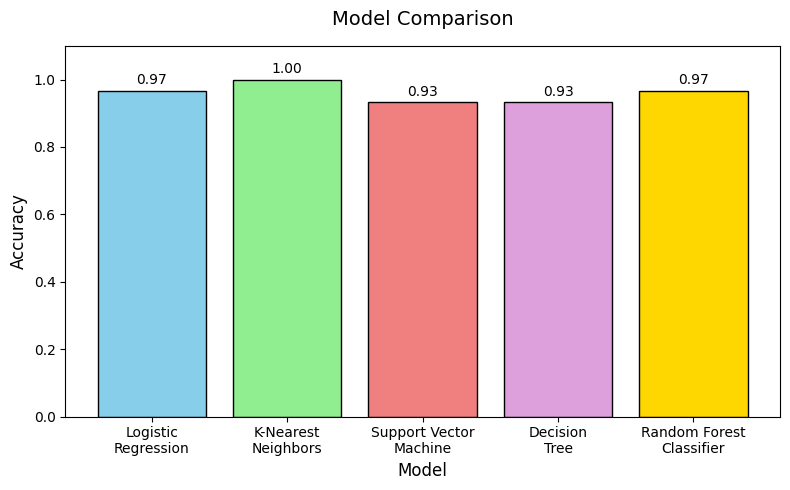

In [40]:
# Compare model accuracies
model_names = [
    "Logistic\nRegression",
    "K-Nearest\nNeighbors",
    "Support Vector\nMachine",
    "Decision\nTree",
    "Random Forest\nClassifier",
]
model_scores = [accuracy_lr, accuracy_knn, accuracy_svm, accuracy_dt, accuracy_rf]

# Plot the accuracies
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(model_names, model_scores, color=['skyblue', 'lightgreen', 'lightcoral', 'plum', 'gold'], edgecolor='black')

# Add accuracy values above bars
for bar, score in zip(bars, model_scores):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.01,
        f"{score:.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
    )

# Customize labels and title
ax.set_xlabel("Model", fontsize=12)
ax.set_ylabel("Accuracy", fontsize=12)
ax.set_title("Model Comparison", fontsize=14, pad=15)
ax.set_ylim(0, 1.1)  # Extend y-axis slightly for clarity

# Display the plot
plt.tight_layout()
plt.show()

In [41]:
from sklearn.model_selection import cross_val_score

models = {
    "Logistic Regression": logistic_model,
    "K-Nearest Neighbors": knn_model,
    "Support Vector Machine": svm_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name}: Mean CV Accuracy = {scores.mean():.4f}, Std Dev = {scores.std():.4f}")

Logistic Regression: Mean CV Accuracy = 0.9591, Std Dev = 0.0259
K-Nearest Neighbors: Mean CV Accuracy = 0.9726, Std Dev = 0.0257
Support Vector Machine: Mean CV Accuracy = 0.9591, Std Dev = 0.0339
Decision Tree: Mean CV Accuracy = 0.9522, Std Dev = 0.0469
Random Forest: Mean CV Accuracy = 0.9591, Std Dev = 0.0259


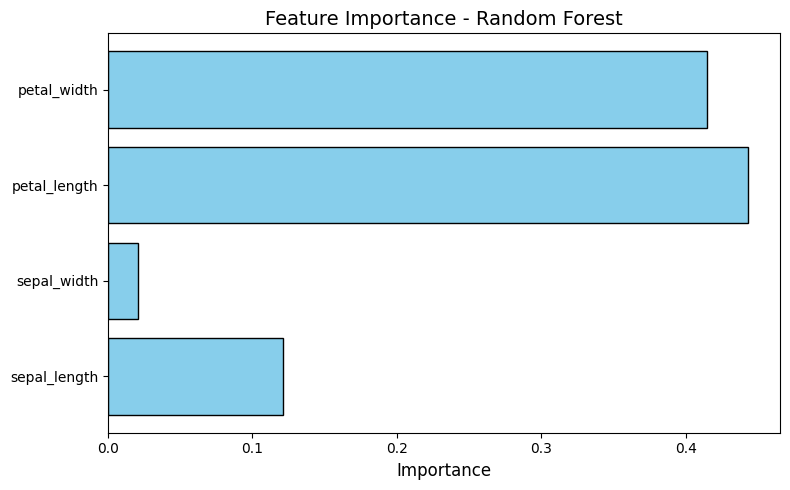

In [42]:
importances = rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances, color='skyblue', edgecolor='black')
plt.title("Feature Importance - Random Forest", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.tight_layout()
plt.show()

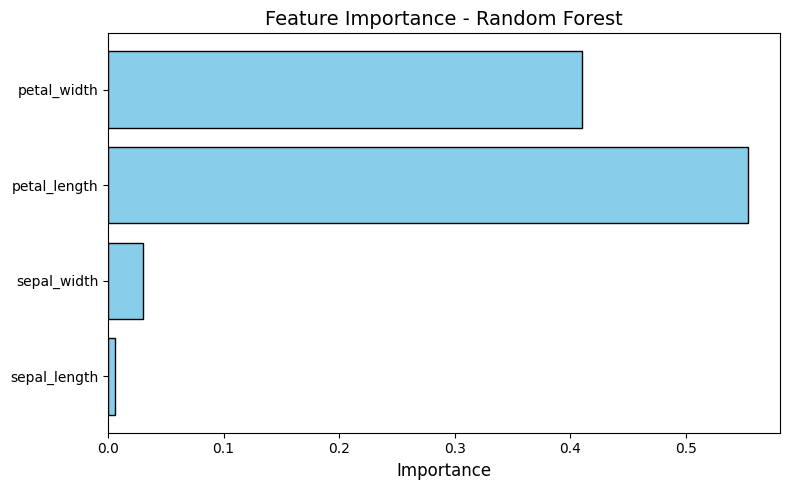

In [43]:
importances = dt_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances, color='skyblue', edgecolor='black')
plt.title("Feature Importance - Random Forest", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.tight_layout()
plt.show()

In [44]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(
    estimators=[
        ('lr', logistic_model),
        ('knn', knn_model),
        ('svm', svm_model),
        ('dt', dt_model),
        ('rf', rf_model),
    ],
    voting='hard'
)

ensemble_model.fit(X_train, y_train)
ensemble_accuracy = ensemble_model.score(X_test, y_test)
print(f"Ensemble Model Accuracy: {ensemble_accuracy:.4f}")

Ensemble Model Accuracy: 0.9667


In [45]:
import pickle
with open('iris_model.pkl', 'wb') as f:
    pickle.dump(logistic_model, f)

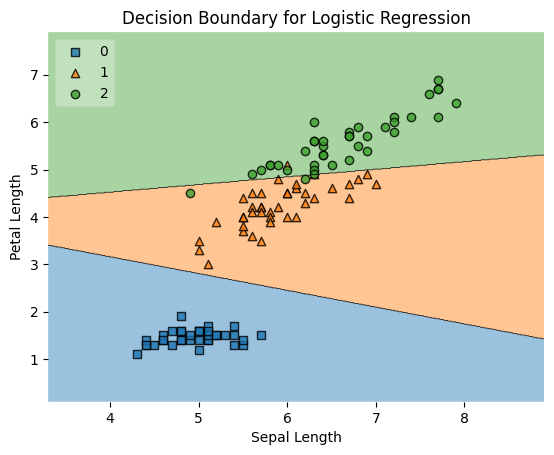

In [46]:
from mlxtend.plotting import plot_decision_regions
import numpy as np

X_reduced = X_train.iloc[:, [0, 2]].values  # Selecting 2 features
y_reduced = y_train.values
logistic_model.fit(X_reduced, y_reduced)
plot_decision_regions(X_reduced, y_reduced, clf=logistic_model, legend=2)
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Decision Boundary for Logistic Regression")
plt.show()